**Univariate distribution**  
Only a single variable under consideration. It does not deal with causes nor relationships. The main purpose to to find patterns within this one variable.  
Patterns such as: Central Tendency and Dispersion  
Central Tendency: mean, median, mode  
Dispersion: Range, Variance, Standard Deviation, Maximum, Minimum values, Interquartile Range  
Visualize the data: Pie charts, bar graphs, histograms
Existence of Outliers

**Bivariate distribution**  
Involves 2 features/ variables to find the relationship between them. One of these variables is often independant while the other is a dependant variable.  
Visualize the data: scatter plots, side by side boxplots, curve fitting, correlation analysis
Common statistical methods: Regression analysis, Correlation coefficient analysis  

**Mulitvariate distribution**  
Involves 3 or more variables. It is an advance method to study large datasets.  
Common statistical methods: Additive Tree, Cluster Analysis, Correspondence Analysis, Factor Analysis, MANOVA, multidimensional scaling, mulitple regression analysis, principal component analysis and reduncy analysis

**Types of EDA**  
EDA consist of two methods. One is the non-graphical way and the other is the graphical one. 
Non-graphical methods involve the calculation of summary statistics while the graphical way is the use of diagrams for visualization

**Objectives of conducting EDA**
* What is the distribution of the Dataset?
* Are there any missing numerical values, outliers or anomalies in the dataset?
* What are the underlying assumptions in the dataset? (?)
* Are there relationships between variables in the dataset? 
* Prepare dataset to be fed for machine learning
* What is the most suitable algorithm for a given dataset (?)

**Tinder Dataset**  
For this project I'll be using a Tinder dataset which shows data of users that finding themselves in a relationship through the use of the Tinder dating application. This mini dataset consist of questions answered by millennials from differernt Universities.  
The Dataset can be found here: https://www.kaggle.com/datasets/benroshan/tinder-millennial-match-rate  
Created by: ADAM HALPER

**Variables/ Features are categorized into 3 categories: continous, discrete or categorical**  
* ID -User id  
* Segment type : Medium of Usage (categorical)  
* Segment Description: Name of Universities (categorical)  
* Answer: Do you use tinder ? (categorical)  
* Count: Number of Matches (discrete)  
* Percentage: % of matches (continuous)  
* It became a relationship- Success of relationship (Target) (categorical)  

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("Tinder Millennial Match Rate Dataset.csv", sep = ",", header = 0)

**df.info()**  
gives us information about column names, existence of null values and data datatypes

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        453 non-null    int64  
 1   Segment Type              453 non-null    object 
 2   Segment Description       453 non-null    object 
 3   Answer                    453 non-null    object 
 4   Count                     453 non-null    int64  
 5   Percentage                453 non-null    float64
 6   It became a Relationship  453 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 24.9+ KB


**Observation**:  
'object' datatype represent String values under their respective columns. This makes sense because these values are under 'Categorical' category under their respective column/feature/variable.

**df.describe()**  
allows us to detect outliers in our dataset

In [20]:
df.describe()

,ID,Count,Percentage
count,453.000000,453.000000,453.000000
mean,293333.000000,22.373068,0.331141
std,261.828188,136.996075,0.316157
min,292881.000000,0.000000,0.000000
25%,293107.000000,0.000000,0.000000
50%,293333.000000,1.000000,0.250000
75%,293559.000000,4.000000,0.500000
max,293785.000000,1969.000000,1.000000


**Observation:**  
ID columns can be ignored in this case. The numerical value under this column acts as a categorical value more, instead of a discrete/ continuous value.

We can observe that there exist certain outliers in the dataset as the maximum number of matches obtained by some people have reached 1969 counts although the average number of matches in the dataset is 22. Even after accounting for extreme cases away from the average value, 22 +- 136.996 (which approximates to 159 matches), 1969 matches is clearly an outlier. 

**Checking for missing values in the dataset**  
df.isna().sum() shows the number of NA values in each column respectively which is a neat way to identify any NA values.  

In [23]:
df.isnull().sum()

ID                          0
Segment Type                0
Segment Description         0
Answer                      0
Count                       0
Percentage                  0
It became a Relationship    0
dtype: int64

**Observations**:  
we can see that there are no NA values in all columns

**pd.notnull(df).all()**  
pd.notnull(df) changes ALL values in the dataframe into either 'True' or 'False' values. if the call is empty, NA, pd.notnull(df) will turn that cell value into 'False'

**pd.notnull(df).all()**  
collapses/ summarizes the entire dataframe into their respective columns only. For easy analysis.  

we can prove this code works by replacing a single value into a copy dataframe and applying the above code.

In [26]:
df1 = df.replace(df.iloc[0,1], np.nan)

In [27]:
pd.notnull(df1).all()

ID                           True
Segment Type                False
Segment Description          True
Answer                       True
Count                        True
Percentage                   True
It became a Relationship     True
dtype: bool

**Observation**  
We can observe that the column we inserted a NaN value in did reflect 'False' when using pd.notnull(df).all(). This shows that the code is effective in identifying NaN values.

In [29]:
pd.notnull(df).all()

ID                          True
Segment Type                True
Segment Description         True
Answer                      True
Count                       True
Percentage                  True
It became a Relationship    True
dtype: bool

**Observation**  
Applying the function back to the original dataframe, no NaN values exist in the dataframe

**Univariate Analysis**  
Since the column/features 'Count: Number of Matches (discrete)' and 'Percentage: % of matches (continuous)' are the only numerical columns that has numbers as their values, we'd be focusing on these in our Univarate Analysis only. 

- Central Tendency analysis are measures that help identify a central value that describes the probability distribution. It is a way to determine the "center" or "location" of the distribution. Common methods of finding the "Central Tendency" are: Mean, Median or Mode. The most common measure of central tendency is the mean/ average. For skewed distributions or when there exist outliers in the dataset, using the Median may be preferred.  

- Dispersion Analysis is a measure of how far data points can be found away from the "center" (the spread). Common methods used in dispersion analysis are Variance, Standard Deviation and Inter Quartile Range (IQR). Variance shows us how spreaded out a set of numbers are. Standard Deviation refers to how spread out a set of numbers are in relation to the mean of the dataset. Both Variance and Standard deviation are useful methods of measuring the spread of a dataset. Interquartile range can be best understood with a boxplot.

However, categorical values E.g Blue, Red etc can also be used to conduct Univariate Analysis, we'll just focus on 'Count' column for this segment.

**Central Tendency Analysis**

In [113]:
indx = df['Count'] < 6
filtered_count_col = df['Count'].loc[indx]
print(filtered_count_col)

3      0
4      0
5      0
18     0
19     2
      ..
448    4
449    1
450    2
451    3
452    1
Name: Count, Length: 353, dtype: int64


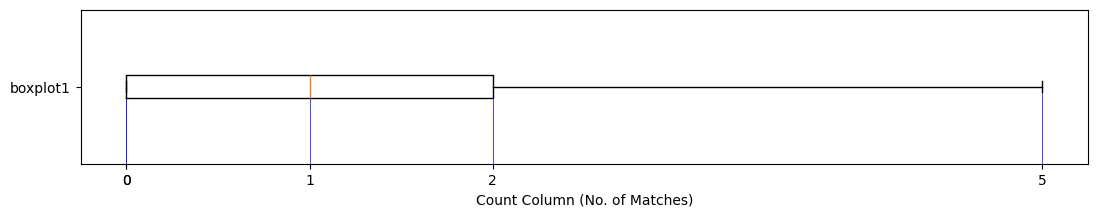

In [35]:
fig1 = plt.figure(1, figsize=(13, 2)) # explicitly creating figure
ax1 = fig1.add_subplot(1, 1, 1) # explicitly creating subplot

ax1.boxplot(filtered_count_col, vert = False, manage_ticks = True)

ax1.set_xlabel('Count Column (No. of Matches)')
ax1.set_yticks([1])
ax1.set_yticklabels(['boxplot1'])

# explicity set 0th quartile, 1st, 2nd, 3rd and 4th percentage quartiles depending on your need to identify values at different quartile locations. Default%: 0, 25, 50, 75, 100
quantiles = np.quantile(filtered_count_col, np.array([0, 0.25, 0.5, 0.75, 1]))
# zorder (in front or behind the graph plot), 0th stands for 'all the way to the back'. 
# ymin & ymax expects a min and max value for each quantile position so that they know where to start the line and where to stop the line. 
# this kwargs expects a list whose index represent the quartile position of the ymin/ymax value respectively. try ymix = [2,1,0,0,0] to see what happens
ax1.vlines(quantiles, ymin = [0] * quantiles.size, ymax = [1] * quantiles.size, color='b', ls='-', lw=0.5, zorder=0)
# keep the boxplot centered in the output image. y-axis referes to boxplot1 axis in this case
ax1.set_ylim(0.5, 1.5)
# override the default x-tick labels. However, in this case the quantiles coincide with the default labels. so this function is not needed actually
ax1.set_xticks(quantiles)

plt.show()

**Observation**  
I chose to filter the rows of 'Count' column to focus on people that has 6 matches or less only. The number of people that have 6 or less matches make up the majority of the dataset, a total of 353 rows of 453 within the dataset. 33% (100 people) are considered outliers as they exceed the maximum value (threshold) calculated by the boxplot() function. The min value is determined by taking (Q1 - 1.5 * Interquartile range) = minimum value and the max value is calculated with (Q3 + 1.5 * IQR) = maximum value.  

Here the IQR is between 75-percentile and 0-percentile (3rd quartile and 1st quartile respectively), which means it is 2-0 = 2.

In [37]:
filtered_count_col.describe()

count    353.000000
mean       1.209632
std        1.331958
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: Count, dtype: float64

**Dispersion Analysis**  
Since we have looked at Central Tendency Analysis previously (Mean, Median, Standard Deviation, IQR, min & max), these values can only be obtained from quantitative variables (columns) unlike catergorical variables. Although it is possible, we would need to apply data transformation to those categorical values first and convert them into quantitative variables.  

In dispersion analysis, we look at skewness and kurtosis to identify the shape of the variable ( 'Count' in this case )  

**Skewness**  
Is an indicator of how symetric the graph would look like if your variable is plotted. Or how much 'dissymmetry' your graph looks like.  
Negative Skewness means that the 'tail' of the graph is on the left. and the 'mean' value is located towards the tail. **Mean** < **Median** < **Mode**  
Zero Skewness shows that the data graph is symmetrical E.g normal distribution  
Positive Skewness means that the 'tail' of the graph is on the right. and the 'mean' value is located towards the tail. **Mean** > **Median** > **Mode**

<img src="skewness.jpg" width="400" height="300" style="display:inline-block;"><img src="skewness2.png" width="300" height="200" style="display:inline-block;">

In [40]:
filtered_count_col.skew()

np.float64(1.1413809355676823)

The skew value above is 1.14138. The 'count' column is slightly positively skewed (right skewed).
Since we are not dealing with time-series data but discrete values instead, 

**Reference ranges of skewness**  

-0.5 to 0.5 means that the data is fair symmetrical  
-1 to -0.5 means that the data is negatively skewed (anything > -1 shows extreme negative skewness)   
0.5 to 1 means that the data is positively skewed (anything > 1 shows extreme positive skewness)  

we can double check with a graph

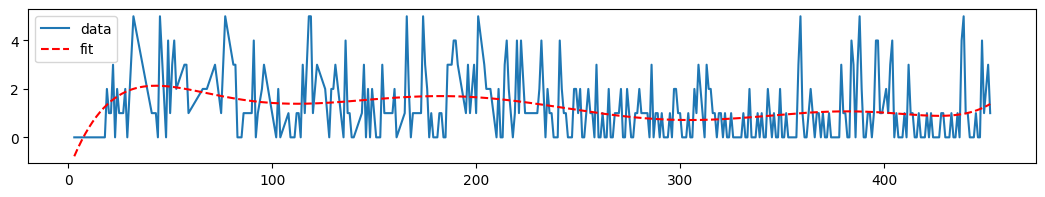

In [100]:
fig1 = plt.figure(1, figsize=(13, 2)) # explicitly creating figure
ax1 = fig1.add_subplot(1, 1, 1) # explicitly creating subplot

# x-axis = row index (I.E ID of person on tinder app)
# y-axis = number of matches corresponding to that person. Plot orginal graph values
ax1.plot(filtered_count_col.index, filtered_count_col.values, label = "data")

p_coefficient = np.polyfit(filtered_count_col.index, filtered_count_col.values, 7)
#poly-graph function itself
p_func = np.poly1d(p_coefficient)
# creating a evenly spaced 'dotted-values' for polygraph
p_xVal = np.linspace(filtered_count_col.index.min(), filtered_count_col.index.max(), 500)
# obtaining y-values
p_yVal = p_func(p_xVal)

# plot poly graph
ax1.plot(p_xVal, p_yVal, color='red', label='fit', linestyle='--')
ax1.legend()

As we can see the graph is sightly skewed towards the right. As indicated by 1.141 skewness value. Although this is a Univariate analysis, the 'Count' column is considered a Index-Based Data (e.g., row index, ranking data)

In [13]:
df.shape

(453, 7)

plot of number of matches each person has
default theme

In [19]:
sns.set_theme()

In [15]:
num_outliers = (df['Count'] > 300).sum()
num_outliers

np.int64(9)

Exclude found outliers  

In [16]:
outlier_df = df[df['Count'] > 300]
outlier_df

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
0,292881,Mobile,Mobile respondents,Yes,797,0.207,Yes
1,292883,Mobile,Mobile respondents,No,1969,0.511,No
2,292885,Mobile,Mobile respondents,I don't use Tinder,1090,0.283,Yes
6,292893,Gender,Male respondents,Yes,472,0.213,Yes
7,292895,Gender,Male respondents,No,1172,0.528,No
8,292897,Gender,Male respondents,I don't use Tinder,574,0.259,No
9,292899,Gender,Female respondents,Yes,325,0.198,No
10,292901,Gender,Female respondents,No,797,0.487,Yes
11,292903,Gender,Female respondents,I don't use Tinder,516,0.315,No


In [17]:
filtered_df = df.drop(outlier_df.index.tolist(), axis = 0)
filtered_df.shape

(444, 7)

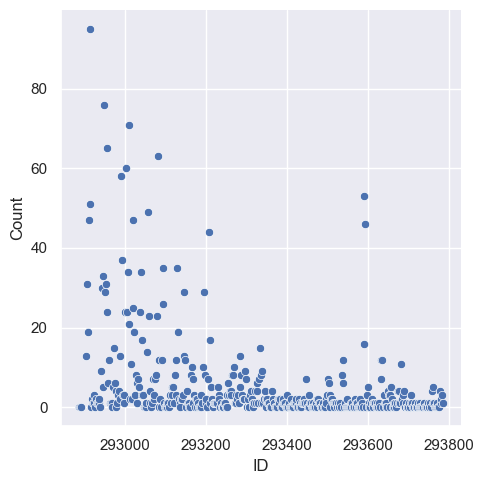

In [20]:
sns.relplot(data = filtered_df, x = 'ID', y = 'Count') 

can imagine bob, susan, tom have [ 5, 1, 1 ] matches respectively. the y-axis will indicate 2 counts at One-th index on the X-Axis.   
and y-axis will indicate 1 count at the fifth index on the X-Axis  

Text(0, 0.5, 'No. of Tinder IDs that have X number of Matches')

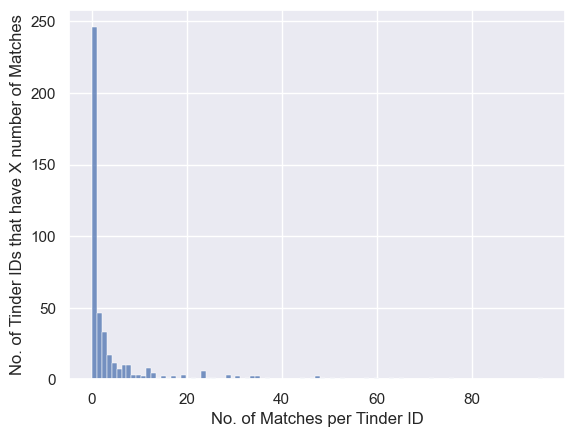

In [102]:
# alternate code to plot: sns.histplot(x = filtered_df['Count'])
sns.histplot(data=filtered_df, x = "Count")
plt.xlabel('No. of Matches per Tinder ID')
plt.ylabel('No. of Tinder IDs that have X number of Matches')

In [96]:
# my data is skewed to the left
filtered_df['Count'].skew()

np.float64(3.8252028583783284)

In [1]:
import os

In [4]:
os.system("export PATH=/Library/TeX/texbin:$PATH")

1

In [6]:
os.system("jupyter nbconvert TinderEDA.ipynb --to pdf")

1

Reference:   
Github Username: Prashant Banerjee  
Repository title: Exploratory Data Analysis with Python.ipynb  
Link: https://gist.github.com/pb111/f33c0f7be3c20f304301b601257fc167